In [65]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [84]:
df = pd.read_csv("C:\\Users\\Saeid\\OneDrive\\Desktop\\DataSet\\Sample - Superstore.csv")
furniture = df.loc[df['Category'] == 'Furniture']

In [85]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('2014-01-06', '2017-12-30')

In [86]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [87]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [88]:
furniture = furniture.set_index('Order Date')
furniture.index

Index(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11', '2014-01-13',
       '2014-01-14', '2014-01-16', '2014-01-19', '2014-01-20', '2014-01-21',
       ...
       '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22', '2017-12-23',
       '2017-12-24', '2017-12-25', '2017-12-28', '2017-12-29', '2017-12-30'],
      dtype='object', name='Order Date', length=889)

In [89]:
y = furniture['Sales'].resample('MS').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [80]:
 pip install Pandas version 1.2.0

Note: you may need to restart the kernel to use updated packages.


    ERROR: Complete output from command python setup.py egg_info:
    ERROR: Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\Saeid\AppData\Local\Temp\pip-install-trccxav8\version\setup.py", line 4, in <module>
        from version import __version__
      File "C:\Users\Saeid\AppData\Local\Temp\pip-install-trccxav8\version\version.py", line 2, in <module>
        from itertools import izip_longest
    ImportError: cannot import name 'izip_longest' from 'itertools' (unknown location)
    ----------------------------------------
ERROR: Command "python setup.py egg_info" failed with error code 1 in C:\Users\Saeid\AppData\Local\Temp\pip-install-trccxav8\version\


In [81]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [82]:
y.plot(figsize=(15, 6))
plt.show()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [74]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

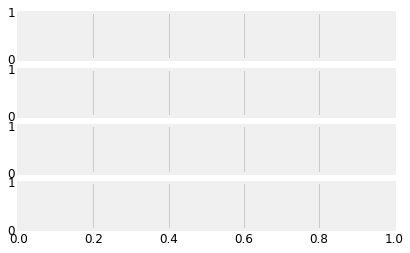

In [75]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()